## Install dependencies

In [136]:
%pip install matplotlib
%pip install pandas
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Read Data

In [137]:

import pandas as pd
import matplotlib as plt
from datetime import datetime
import matplotlib.pyplot as plt

results = pd.read_csv("results.csv")

In [138]:
would_like_features = {
    0: "Reporte de incidentes con fotos",
    1:"Ubicación del incidente", 
    2:"Notificaciones de seguimiento",
    3:"Contacto con autoridades",
    4:"Foro comunitario"
}
total_entries = results.shape[0]

frequency_problems_labels = {
    -2: "Rara vez",
    -1: "A veces",
    0: "Nunca",
    1: "Frecuentemente",
    2: "Siempre"
}
closed_questions_labels = {False: "No", True: "Si"}
gender_labels = {0: "Femenino", 1: "Masculino"}
ambiguous_questions_labels = {
    -1: "No",
    0: "Talvez",
    1: "Si",
    
    
}

## Helper functions

In [139]:

def string_to_number(number_string: str):
    number_string = number_string.strip()

    try:
        return int(number_string)
    except:
        pass

    return None

closed_question_serializer = lambda ans: ans=="Sí"

def range_question_serialize(ans: str):
    result = 0
    if ans == "Rara vez":
        result = -2
    elif ans == "A veces":
        result = -1
    elif ans == "Frecuentemente":
        result = 1
    elif ans == "Siempre":
        result = 2

    return result

def range_question_serialize_authority(ans: str):
    result = 0
    if ans == "Nada efectiva":
        result = -2
    elif ans == "Poca efectiva":
        result = -1
    elif ans == "Algo efectiva":
        result = 1
    elif ans == "Muy efectiva":
        result = 2

    return result

def string_list_serializer(ans: str):
    return ans.split(";")


def serialize_would_like_features(ans: str):
    answers = ans.split(";")
    serialized_answers = []
    for answer in answers:
        for k, v in would_like_features.items():
            if answer.strip() == v:
                serialized_answers.append(k)

    return serialized_answers

## Change column names

In [140]:

new_name_columns = [
    "date",
    "age",
    "gender",
    "has_access_smartphone",
    "would_use_app",
    "uses_social_mobile_apps",
    "years_lived_in_dimitrov",
    "frequency_security_problems_dimitrov",
    "frequency_waste_problems_dimitrov",
    "security_problems",
    "waste_problems",
    "knows_where_report",
    "are_authorities_efective",
    "would_like_features"
]



results.columns = new_name_columns

## Serialize Data

In [141]:
results["date"] = results["date"].apply(lambda ds: datetime.strptime(ds[:-4], "%Y/%m/%d %I:%M:%S %p"))

# there are some ages that does not include only digits so i will omit those
results["age"] = results["age"].apply(string_to_number)
average_age = results["age"].mean()
results["age"] = results["age"].fillna(round(average_age))

results["gender"] = results["gender"].apply(lambda gs: 1 if gs=="Masculinos" else 0)
results["has_access_smartphone"] = results["has_access_smartphone"].apply(closed_question_serializer)
results["would_use_app"] = results["would_use_app"].apply(lambda ws: 1 if ws == "Sí" else (0 if ws == "Tal vez" else -1) )
results["uses_social_mobile_apps"] = results["uses_social_mobile_apps"].apply(closed_question_serializer)

# drop years_lived_in_dimitrov because the data has too much noise
results.drop("years_lived_in_dimitrov", axis=1, inplace=True)

results["frequency_security_problems_dimitrov"] = results["frequency_security_problems_dimitrov"].apply(range_question_serialize)
results["frequency_waste_problems_dimitrov"] = results["frequency_waste_problems_dimitrov"].apply(range_question_serialize)
results["security_problems"] = results["security_problems"].apply(string_list_serializer)
results["waste_problems"] = results["waste_problems"].apply(string_list_serializer)
results["knows_where_report"] = results["knows_where_report"].apply(closed_question_serializer)

results["would_like_features"] = results["would_like_features"].apply(serialize_would_like_features)


## Generate graphs

In [142]:



get_results_absolute_value = lambda p: f'{int(p * total_entries / 100)}'

def create_plot(name: str):
    plt.savefig("output/graphs/"+ name + ".png", bbox_inches='tight')
    plt.show()
    plt.clf()

def create_closed_question_distribution_pie(df: pd.DataFrame, column: str, title: str):
    distribution_plot = results[column].value_counts().rename(index=closed_questions_labels).plot(kind="pie", autopct=get_results_absolute_value)
    distribution_plot.set_title(title)
    distribution_plot.set_axis_off()

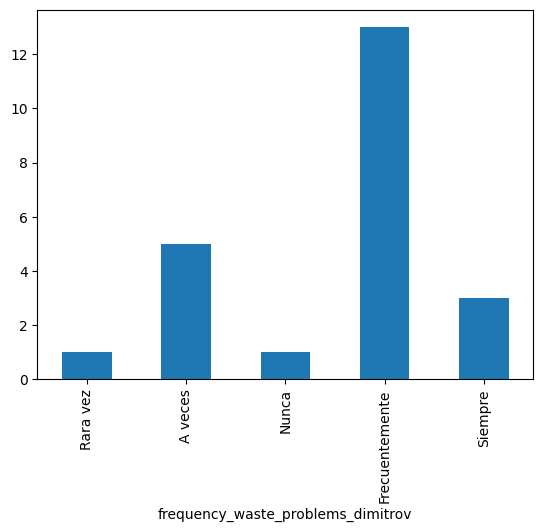

<Figure size 640x480 with 0 Axes>

In [143]:
waste_problems_plot = results.groupby("frequency_waste_problems_dimitrov")["frequency_waste_problems_dimitrov"].count()
waste_problems_plot = waste_problems_plot.rename(index=frequency_problems_labels)
waste_problems_plot = waste_problems_plot.plot(kind="bar")
create_plot("frecuencia_desechos_problemas")


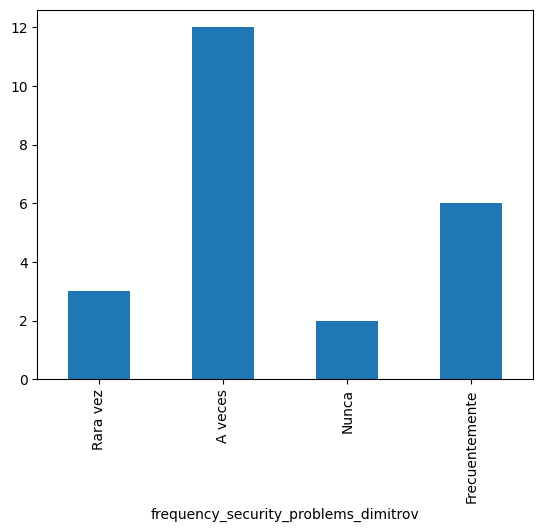

<Figure size 640x480 with 0 Axes>

In [144]:
security_problems_plot = results.groupby("frequency_security_problems_dimitrov")["frequency_security_problems_dimitrov"].count()
security_problems_plot = security_problems_plot.rename(index=frequency_problems_labels)
security_problems_plot = security_problems_plot.plot(kind="bar")
create_plot("frecuencia_problemas_seguridad")



## Analisis

## Evaluar la percepción y aceptación del uso de aplicaciones tecnológicas

### ¿Tiene acceso a un teléfono inteligente (smartphone)?

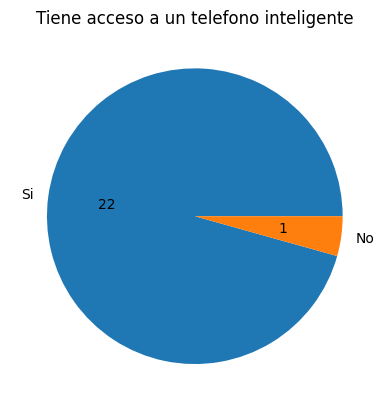

<Figure size 640x480 with 0 Axes>

In [145]:

create_closed_question_distribution_pie(df=results, column="has_access_smartphone",title="Tiene acceso a un telefono inteligente" )
create_plot("tiene_telefono")


### ¿Utiliza aplicaciones móviles de redes sociales o mensajería?

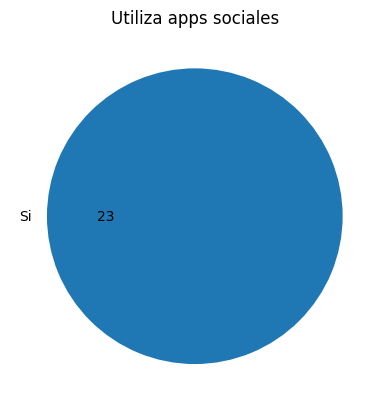

<Figure size 640x480 with 0 Axes>

In [146]:
create_closed_question_distribution_pie(df=results, column="uses_social_mobile_apps", title="Utiliza apps sociales")
create_plot("usa_apps_sociales")


### ¿Estaría dispuesto(a) a usar una aplicación para reportar problemas de seguridad o basura en su barrio? 

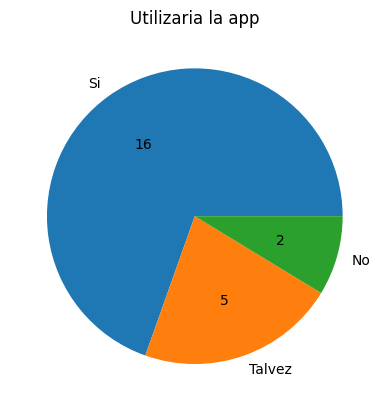

<Figure size 640x480 with 0 Axes>

In [147]:
would_use_app_plot = results["would_use_app"].value_counts().rename(index=ambiguous_questions_labels).plot(kind="pie", autopct=get_results_absolute_value)
would_use_app_plot.set_title("Utilizaria la app")
would_use_app_plot.set_axis_off()
create_plot("usaria_app")

### Correlacion entre si usarian la app y si tienen smartphone

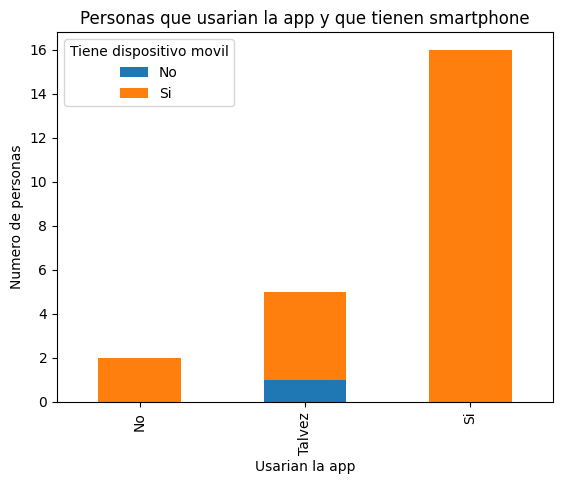

<Figure size 640x480 with 0 Axes>

In [148]:
would_use_app_and_has_smartphone = results.groupby(["would_use_app", "has_access_smartphone"]).size().unstack()
would_use_app_and_has_smartphone_plot = would_use_app_and_has_smartphone.plot(kind="bar", stacked=True)
would_use_app_and_has_smartphone_plot.set_ylabel("Numero de personas")
would_use_app_and_has_smartphone_plot.set_xlabel("Usarian la app")
would_use_app_and_has_smartphone_plot.set_title("Personas que usarian la app y que tienen smartphone")
would_use_app_and_has_smartphone_plot.set_xticklabels(ambiguous_questions_labels.values())
would_use_app_and_has_smartphone_plot.legend(title="Tiene dispositivo movil", labels=closed_questions_labels.values())
create_plot("usaria_app_y_tienen_smartphone")


### Distribucion edad <-> genero

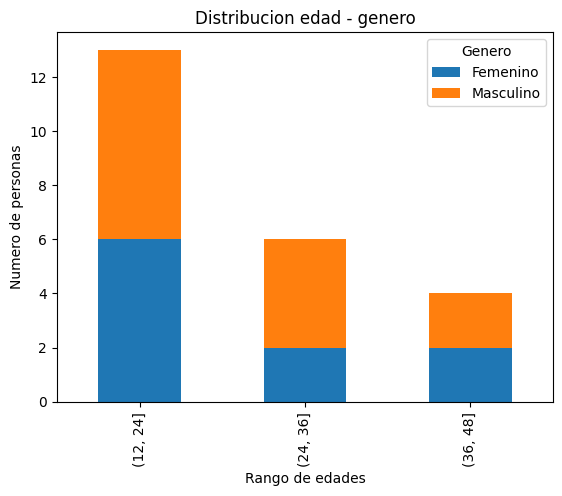

<Figure size 640x480 with 0 Axes>

In [149]:
results["age_range"] = pd.cut(results["age"], [12,24,36,48])
age_gender_plot = results.groupby(["age_range", "gender"], observed=True).size().unstack().plot(kind="bar", stacked=True)
age_gender_plot.set_xlabel("Rango de edades")
age_gender_plot.set_ylabel("Numero de personas")
age_gender_plot.legend(title="Genero", labels=gender_labels.values())
age_gender_plot.set_title("Distribucion edad - genero")
create_plot("distribucion_edad_genero")

### Rangos de edades que utilizarian la app

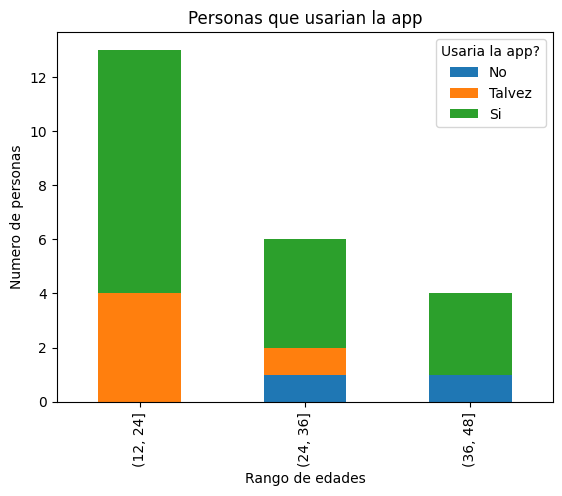

<Figure size 640x480 with 0 Axes>

In [150]:
age_gender_plot = results.groupby(["age_range", "would_use_app"], observed=True).size().unstack().plot(kind="bar", stacked=True)
age_gender_plot.set_xlabel("Rango de edades")
age_gender_plot.set_ylabel("Numero de personas")
age_gender_plot.legend(title="Usaria la app?", labels=ambiguous_questions_labels.values())
age_gender_plot.set_title("Personas que usarian la app")
create_plot("distribucion_usarian_edad")

### Funciones deseadas

In [151]:
print(results["would_like_features"])

0                 [0]
1                 [3]
2                 [0]
3           [1, 2, 4]
4           [0, 1, 2]
5              [1, 2]
6              [0, 1]
7              [0, 3]
8                 [0]
9                 [3]
10             [0, 4]
11    [0, 1, 2, 3, 4]
12    [0, 1, 2, 3, 4]
13    [0, 1, 2, 3, 4]
14       [0, 1, 2, 3]
15                [1]
16             [0, 3]
17          [0, 1, 3]
18          [0, 3, 4]
19             [0, 3]
20                [2]
21                [0]
22    [0, 1, 2, 3, 4]
Name: would_like_features, dtype: object


## Save Serialized Data

In [152]:
results["date"].apply(datetime.date)
results.to_csv("output/serialized_results.csv", index=False)


spanish_results = results.rename(columns={
    "date": "fecha",
    "age": "edad",
    "gender": "genero",
    "has_access_smartphone": "tiene_acceso_smartphone",
    "would_use_app": "usaria_app",
    "uses_social_mobile_apps": "usa_apps_sociales",
    "years_lived_in_dimitrov": "anios_en_dimitrov",
    "frequency_security_problems_dimitrov": "frecuencia_problemas_seguridad",
    "frequency_waste_problems_dimitrov": "frecuencia_problemas_basura",
    "security_problems": "tipos_problemas_seguridad",
    "waste_problems": "tipos_problemas_basura",
    "knows_where_report": "sabe_donde_reportar",
    "are_authorities_efective": "autoridades_efectivas",
    "would_like_features": "funciones_deseadas_app"
})
spanish_results.to_csv("output/datos_serializados.csv")
spanish_results.to_excel("output/datos_serializados.xlsx")

